In [1]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df = df.dropna(subset='job_skills')                ## Dropping NaN values


def clean_list(skill):                       
    return ast.literal_eval(skill)                  ## it runs this and changes String to the List data Type
df['job_skills'] = df['job_skills'].apply(clean_list)


<Axes: xlabel='job_posted_month'>

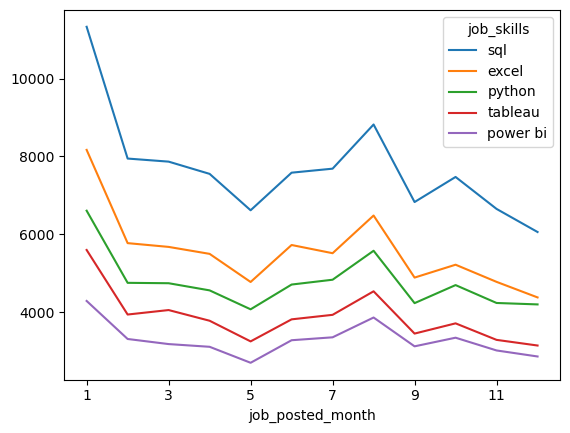

In [2]:
## Objective: 

#1 Make a copy
df_da = df[df['job_title_short']=='Data Analyst'].copy()

#2 Explode
df_da_explode = df_da.explode('job_skills')

#3 Making a month Column
df_da_explode['job_posted_month'] = df_da_explode['job_posted_date'].dt.month


#4 Pivot Table 
df_da_pivot=df_da_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_da_pivot.loc['Total'] = df_da_pivot.sum()
df_da_pivot = df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]

df_da_pivot = df_da_pivot.drop('Total')
df_da_pivot

df_da_pivot.iloc[:, :5].plot(kind='line')

In [3]:
df_da_explode.groupby('job_skills')['job_skills'].size().sort_values(ascending=False)

job_skills
sql          92428
excel        66860
python       57190
tableau      46455
power bi     39380
             ...  
esquisse         1
suse             1
capacitor        1
chainer          1
msaccess         1
Name: job_skills, Length: 235, dtype: int64